# Introduction
<p> This Jupyter notebook is used to create 3-D spatial density plots of the atomic orbitals for the quantum-mechanical hydrogen atom. This is accomplished by using a somewhat obscure Python package called mayavi. Specifically, use will be made of mayavi's volumetric scalar field plotting functionality. The user need only specify the $n,l,$ and $m$ (also called $m_l$) quantum numbers of the desired orbitals, where a choice of $m>0$ will result in two orbitals, $\phi_{n,l,m} (r,\theta,\phi)$ and $\phi_{n,l,-m} (r,\theta,\phi)$, corresponding to the real and imaginary parts of the hydrogen wavefunctions $\psi_{n,l,m} (r,\theta,\phi) = R_{nl} (r) Y_l ^m (\theta,\phi)$. This follows from the definition for the transformed atomic orbital basis set,
\begin{align}
\phi_{n,l,m} (r,\theta,\phi) &= \begin{cases}
\psi_{n,l,m} (r,\theta,\phi) &m=0 \\
\frac{2}{\sqrt{2}} \text{Re}\Bigr( \psi_{n,l,m} (r,\theta,\phi) \Bigr) &m> 0 \\ 
\frac{2}{\sqrt{2}} \text{Im} \Bigr( \psi_{n,l,-m} (r,\theta,\phi) \Bigr) &m< 0 
\end{cases}
\end{align}
Users also have the option of modifying a variety of other settings quite easily, as outlined below. In this verison, this is particularly easy due to the incorporation of a tkinter graphical user interface (GUI). Do note that intrinsic limitations of plotting 3-D graphics may cause some artifacts to appear when rotating the orbital plots. After running the code, it is usually best to reset the kernel so that everything is reset properly. Note that this code is housed in a Jupyter notebook, and so individual code cells can be executed to see what the code accomplishes step by step. While the main function of the code is to produce a separate mayavi scene window containing the interactive illustration of the requested orbital(s), there are many console outputs that tell the user a summary of the requested features and give updates as to how the calculation is proceeding. Most often, though, the code can simply be run in full with a kernel reset. The next sections will describe the functionality of various portions of the code. The code itself will include a large number of comments to further increase readability for the interested user, though generally only the first code section will need to be modified directly by the user through the use of a built-in GUI. An example of the major output from this program is included below. 

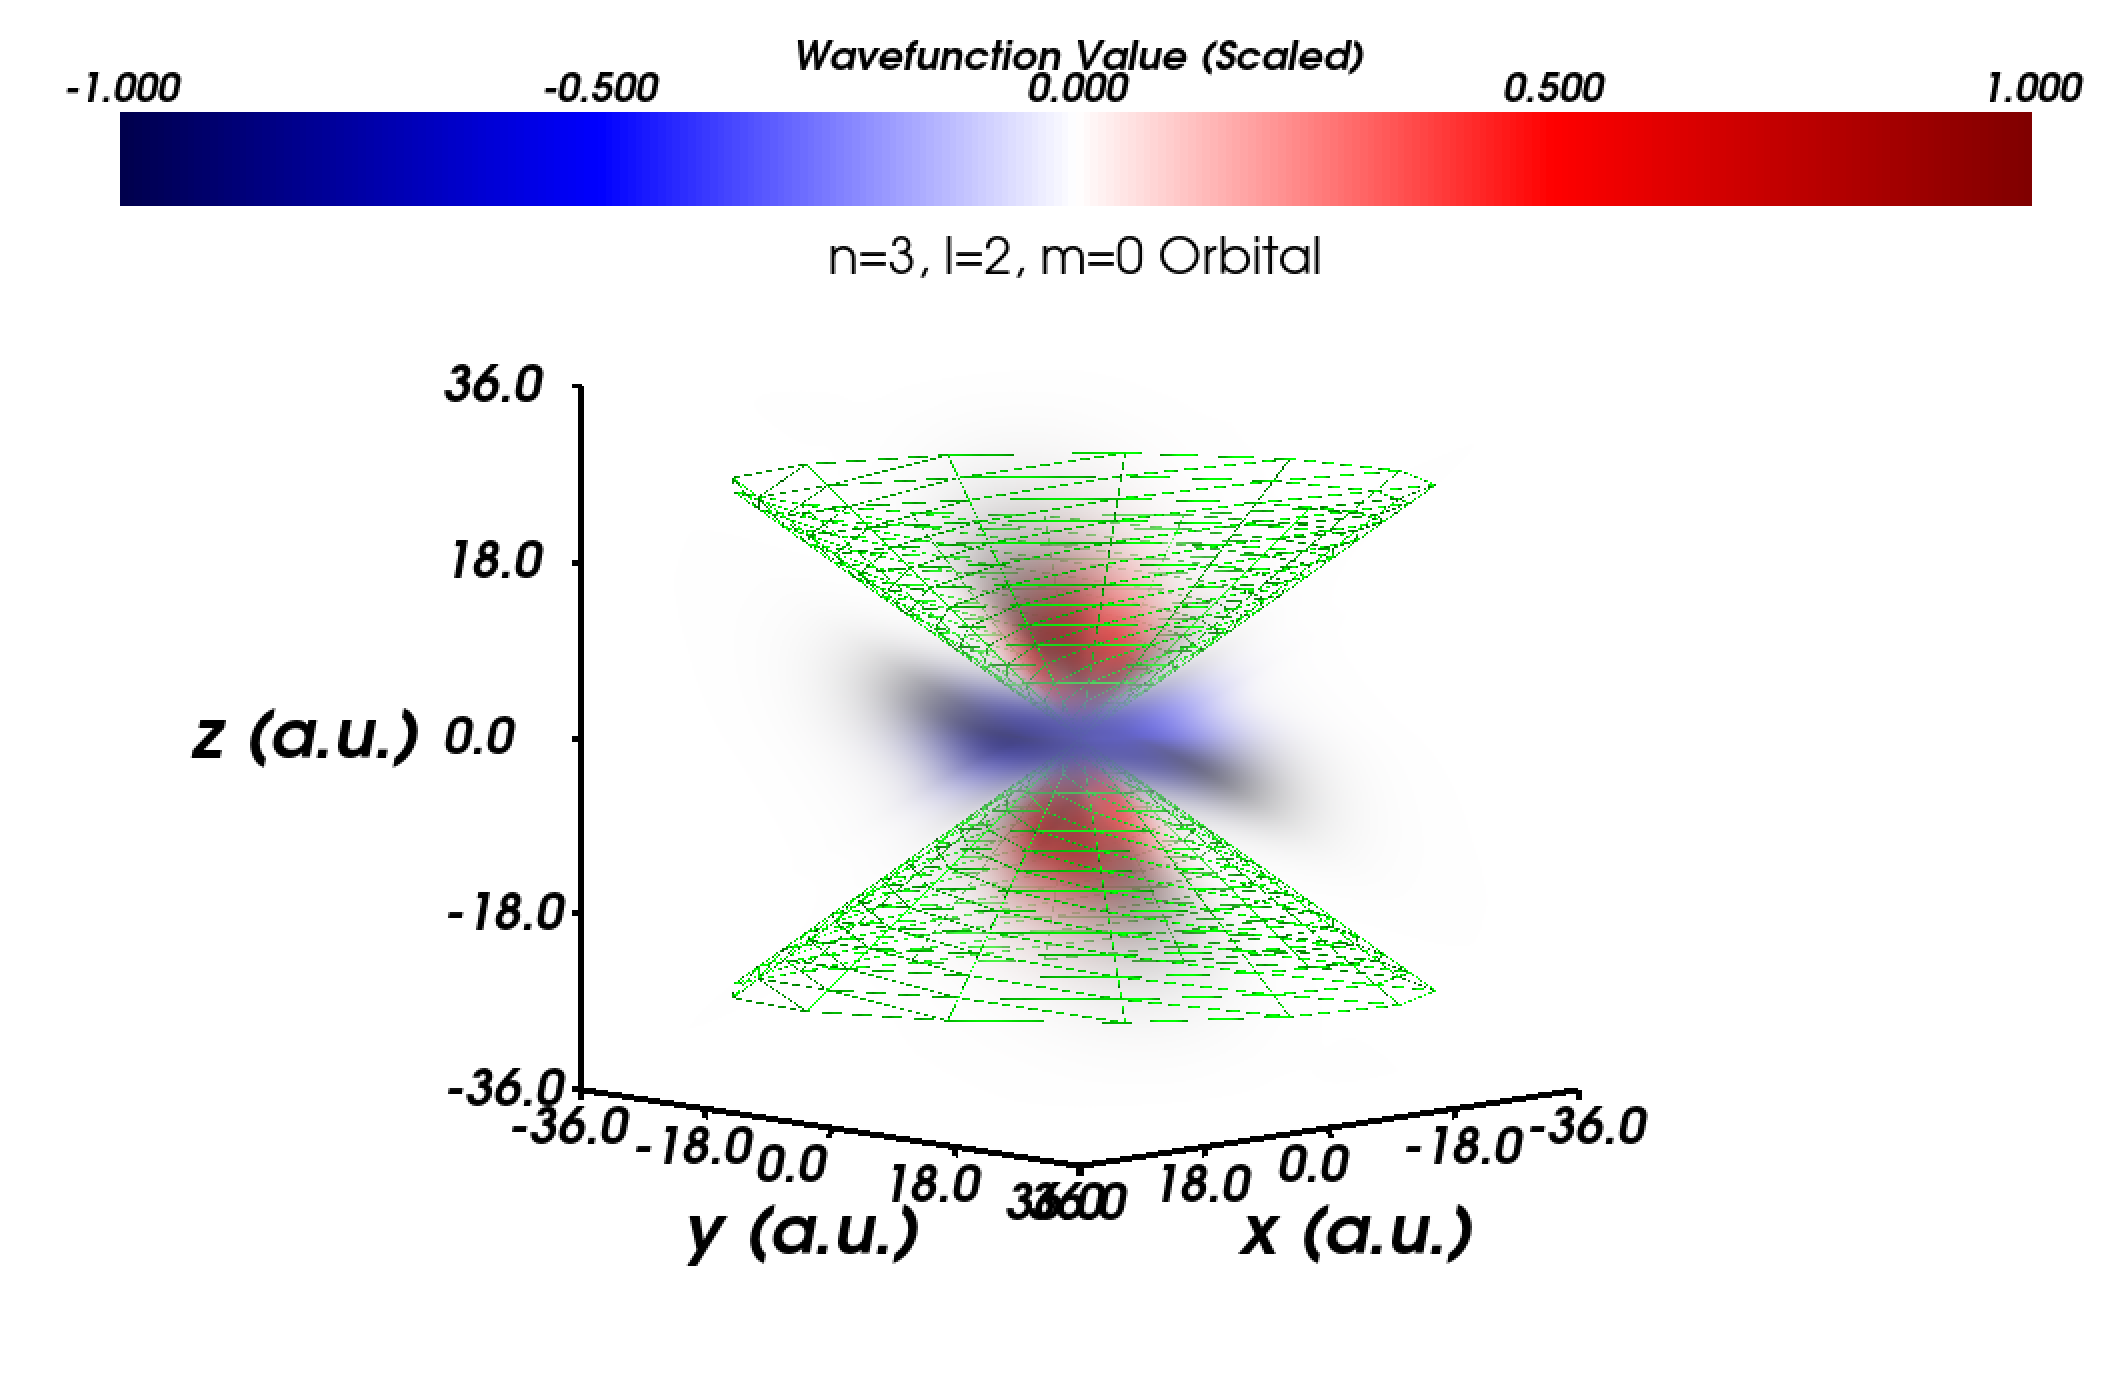

# Most Packages Used in This Program
<p> In the next code cell, a large number of Python packages are imported. Many of these packages, unfortunately, do not come with every Python installation, and therefore must be installed separately. This can be accomplished using pip3 install, the edm install command for the edm shell, or through other means for other distribution types for Python. A description of how to install the requisite software is given in the supplement to our paper. These packages are used for a wide variety of different functionality in the code. A brief explanation of what each package is used for is given here for completeness. 
<p> The math package is used for some standard arithmetic operations such as taking square roots and evaluating factorials. The numpy package expands on the capabilities of the math package, and is the go-to package when evaluating mathematical operations on matrices and arrays of data. This is used extensively throughout the program for a wide variety of functions. Finally, scipy is used for some particularly niche mathematical functions such as the associated Legendre and associated Laguerre polynomials that make up the angular and radial parts of the wavefunction, respectively. 
<p> The sympy package is used to create symbolic representations of the components of the wavefunction. These symbolic representations are passed into the nsolve command to rapidly numerically solve for the roots of each function, which is the same as finding the nodes.
<p> The tkinter package is used to build the GUI that allows us to enter our data in a user-friendly way. The ast package allows us to use a trick for evaluating strings literally when we build and extract values from our GUI. 
<p> The matplotlib package is used to generate standard 2-D plots for the radial wavefunction and probability density, the $\theta$ angular wavefunction, and the real and imaginary parts of the $\phi$ angular wavefunction. While matplotlib does carry some 3-D plotting functionality, it does not include the robust scalar field plotting functionality that we will use to plot the orbitals. Matplotlib also includes a robust colormap package that we will exploit to generate the colormap data we will use to modify the appearance of our volumetric plots. 
<p> The tvtk package includes additional functions used with mayavi to modify and define the colormap and opacity scaling for the scalar field object, among other things. 
<p> Finally, mayavi is the package that does the heavy lifting in this code. The scalar field function is used to generate a fully 3-D spatial volumetric plot of the atomic orbitals we choose with the quantum numbers $n,l,$ and $m$. 
<p> Note that the packages are not all loaded here. This is because of an incompatibility between tkinter and mayavi as we have loaded them. To fix this, we only load mayavi once we are done using tkinter to build the GUI. 

In [1]:
import math
import numpy                #requires separate installation
import scipy                #requires separate installation
from scipy.optimize import root
from scipy import special
import sympy as sym         #requires separate installation
import tkinter as tk
import ast
import matplotlib as mpl    #requires separate installation
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
from tvtk.util import ctf   #requires separate installation
from tvtk.util.ctf import ColorTransferFunction     #used for hacky colormap editing
from tvtk.util.ctf import PiecewiseFunction         #used for hacky opacity editing
print('Initial Packages successfully imported.')    #prints out a message telling the user this section ran successfully

Initial Packages successfully imported.


# User Defined Settings
<p> This is the only section of the code that a typical user will need to interact with. Because this section uses tkinter to build a GUI for the user to input all of the required data and then validates the results, it should be quite simple for users to input valid data for the program. Note that if the user does input some form of invalid data, they will simply be returned to a new GUI window to try again. Console messages below this block will explain which variables were entered improperly. An example of the GUI that opens when the program is executed on a MacOS computer is included below.


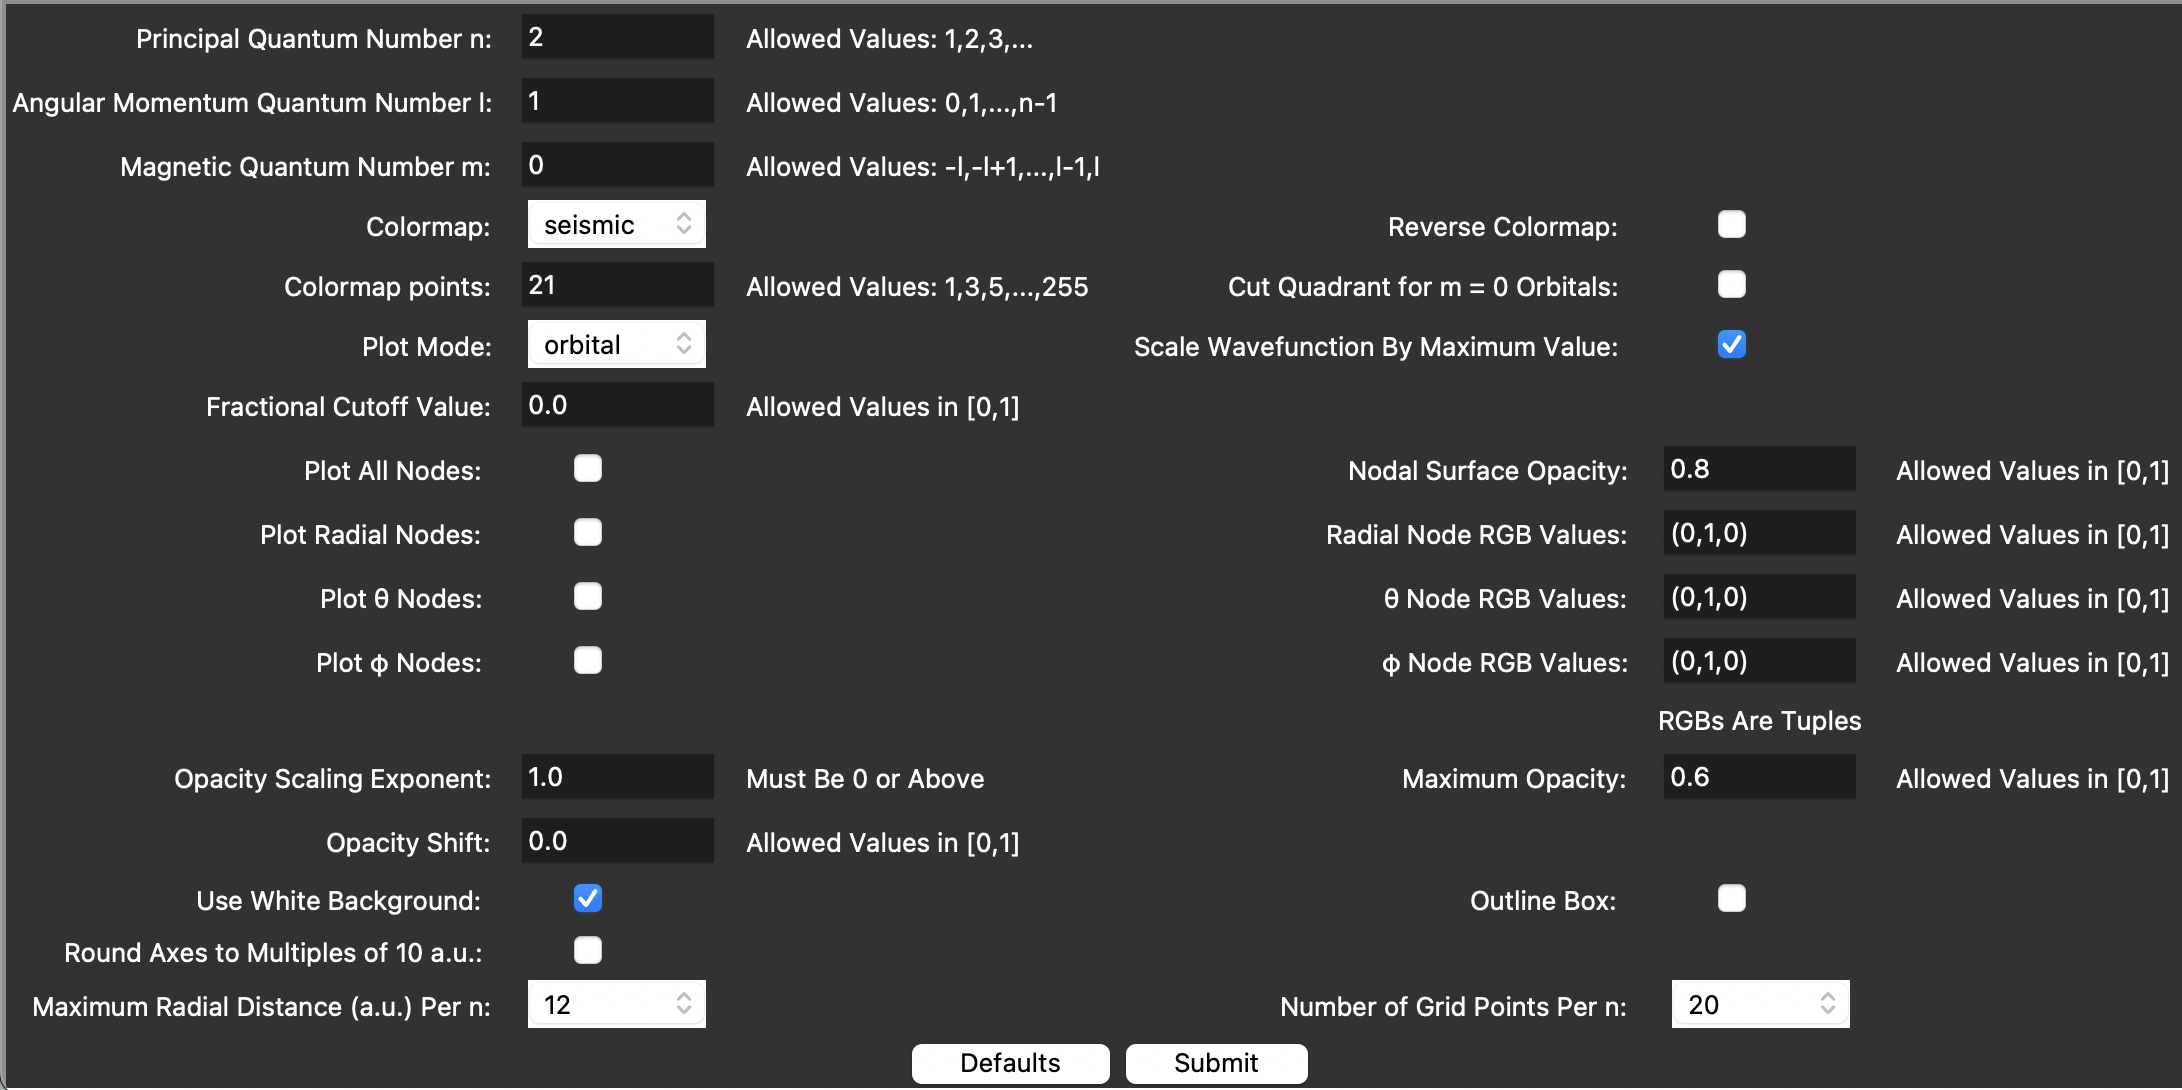

<p> Each of the variables and settings in the GUI customize the visualization and output of the program. First, the three quantum numbers $n,l,$ and $m$ are the usual principal, angular momentum, and magnetic quantum numbers for the hydrogen atom orbitals. When you wish to specify a different orbital, just change these values and run the code after resetting the kernel. The quantum numbers must obey the usual domains,
\begin{align*}
n &\in \mathbb{N} &&n = 1,2,3,\ldots \\
l &\in [0,n-1] \subset \mathbb{Z} &&l = 0,1,2,\ldots,n-1 \\
m &\in [-l,l] \subset \mathbb{Z} &&m = -l,-l+1,\ldots,0,\ldots,l-1,l 
\end{align*}
Note that because of the definition of the orbitals $\phi_{n,l,m}$ we will only use positive values of $m$ when plotting these orbitals, though the program will take care of this for you if you forget. While there are many options that can be altered, changing the quantum numbers is enough to specify a new orbital. 
<p> There are several options presented for the user to modify the colormap used by mayavi. This is done by simply choosing the name of a colormap from matplotlib. Note that most colormaps work just fine, though there are exceptions that are not coded into mayavi. A nice selection of different colormaps is given, though this can be expanded if desired. The colormap can also be reversed, if desired. Finally, the number of points from this colormap used later on in the program can be determined here, and should be an odd number, though this will be corrected later if an even number is given. 
<p> The user can choose whether the program will plot the orbitals $\phi_{n,l,m}$ we have constructed, the radial probability density $r^2|\phi_{n,l,m}|^2$ for the orbital, or even the original unmodified orbitals $\psi_{n,l,m}$. The latter option can be used to illustrate the strange geometrical differences between these two basis sets since it will also return a plot of the orbital's probability density. Passing a negative value for $m$ will work as expected when requesting the original orbitals $\psi_{n,l,m}$. There is also an option for whether the wavefunction will be scaled by its maximum value or whether normalized values of the wavefunction will be used. Finally, there are options for whether the user wants to cut out a quadrant for easier viewing of interior orbital structure for the quantum number $m=0$. When the magnitude of the wavefunction is below the cutoff value (given as a fraction of the maximum magnitude) the values will be turned off to improve visibility. If the cutoff is set to 0, the entire box will be filled with plotted data, which helps illustrate that the wavefunction extends over all of space.  
<p> There are a variety of options for whether all or particular types of nodal surfaces will be plotted along with the orbitals. Note that the individual specific options will override the more general option to plot all the nodes, so if no nodal surfaces are desired all of these flags must be set to False. Any requested nodal surfaces will all share an opacity set by the user here. The colors of the specific nodal surfaces can be adjusted using their RGB values (red, green blue, in that order and on a scale from 0 to 1). By default, the nodal surfaces are set to the color green, as this contrasts quite well with the default color scale from red to blue in the 'coolwarm' colormap used for the orbitals. 
<p> The user is also able to modify the scaling exponents used in modifying the orbital's opacity. A large exponent causes the low-amplitude parts of the orbital to become more transparent, while a small exponent will make the opacity relatively consistent across the orbital. An exponent of 0 is the same as setting the whole scalar field to the same opacity defined by the maximum opacity. The maximum opacity gives the maximum value of the opacity for any region of the plotted orbital (from 0 to 1). Generally it is best if this is left somewhat lower than the maximum (~0.6) for optimal visibility when there are multiple nodes or lobes of the wavefunction. 
<p> Next, the user can choose whether the color scheme for the plot will have a white or a black background and whether the full box surrounding the grid will be plotted in addition to the axes. There is also an option for setting the axes to have a range that is a multiple of 10, which also tends to slightly crop some generally useless data from the edge of the figure. 
<p> The spatial extent and number of grid points used in plotting the orbitals can also be modified by the user. For at least $n<6$, a scale factor of 12 (in units of $a_0$) per $n$ is plenty to see the full structure of the wavefunction. Note that the program will struggle as the values of $n$ get larger if a large multiplier in the definition of $N$ is set, as the number of grid points scales as $N^3$. While using several million data points is perfectly feasible, a notable slowdown will occur using the default values at around $n=6$ since $N^3$ will grow exponentially. 

In [2]:
def submit_button():  #submits updated values for all the variables
    global entries,checks,drops
    print('Variable values set:')
    entries = [entry_variables[i].get() for i in range(len(entry_variables))]
    checks = [check_variables[i].get() for i in range(len(check_variables))]
    drops = [drop_variables[i].get() for i in range(len(drop_variables))]
    print('You may close the window now.')

def defaults_button():  #resets all the values to the defaults
    for i in range(len(entry_variables)):
        entry_variables[i].set(default_entry_variables[i])
    for i in range(len(check_variables)):
        check_variables[i].set(default_check_variables[i])
    for i in range(len(drop_variables)):
        drop_variables[i].set(default_drop_variables[i])
    print('All variables reset to default values:')

# Data boxes to hold information about the GUI; ordered label, box type, row, column
Data_boxes = numpy.array([['Principal Quantum Number n: ','entry',0,0], ['Allowed Values: 1,2,3,...','label',0,2],
                          ['Angular Momentum Quantum Number l: ','entry',1,0], ['Allowed Values: 0,1,...,n-1','label',1,2],
                          ['Magnetic Quantum Number m: ','entry',2,0], ['Allowed Values: -l,-l+1,...,l-1,l','label',2,2],
                          ['Colormap: ','drop',3,0],['Reverse Colormap: ','check',3,3],
                          ['Colormap points: ','entry',4,0], ['Allowed Values: 1,3,5,...,255','label',4,2], ['Cut Quadrant for m = 0 Orbitals: ','check',4,3],
                          ['Plot Mode: ','drop',5,0],['Scale Wavefunction By Maximum Value: ','check',5,3],
                          ['Fractional Cutoff Value: ','entry',7,0], ['Allowed Values in [0,1]','label',7,2],
                          ['Plot All Nodes: ','check',8,0],['Nodal Surface Opacity: ','entry',8,3], ['Allowed Values in [0,1]','label',8,5],
                          ['Plot Radial Nodes: ','check',9,0],['Radial Node RGB Values: ','entry',9,3], ['Allowed Values in [0,1]','label',9,5],
                          ['Plot \u03b8 Nodes: ','check',10,0],['\u03b8 Node RGB Values: ','entry',10,3], ['Allowed Values in [0,1]','label',10,5],
                          ['Plot \u03c6 Nodes: ','check',11,0],['\u03c6 Node RGB Values: ','entry',11,3], ['Allowed Values in [0,1]','label',11,5],
                          ['RGBs Are Tuples','label',12,4],
                          ['Opacity Scaling Exponent: ','entry',13,0],['Must Be 0 or Above','label',13,2],['Maximum Opacity: ','entry',13,3], ['Allowed Values in [0,1]','label',13,5],
                          ['Opacity Shift: ','entry',14,0],['Allowed Values in [0,1]','label',14,2],
                          ['Use White Background: ','check',15,0],['Outline Box: ','check',15,3],
                          ['Round Axes to Multiples of 10 a.u.: ','check',16,0],
                          ['Maximum Radial Distance (a.u.) Per n: ','drop',17,0],['Number of Grid Points Per n: ','drop',17,3],
                          ['Defaults','defaults_button',18,2],['Submit','submit_button',18,3]])
# Options ordered in the same order they appear in Data_boxes; not all available colormaps are actually given #
Drop_options = [['seismic','coolwarm','bwr','jet','viridis','plasma','cool','hot','rainbow'],
                ['orbital','probability density','original'],
                [str(2*i+6) for i in range(13)],
                [str(5*i+10) for i in range(10)]]
default_entry_variables = ['2','1','0','21','0.0','1.0','(0,1,0)','(0,1,0)','(0,1,0)','1.0','0.6','0.0']
default_check_variables = [False,False,True,False,False,False,False,True,False,False]
default_drop_variables = ['seismic','orbital','12','20']

All_valid = False  #master switch that needs to be True to proceed
while All_valid == False:  #the user can't escape the GUI sequence until all the variables are valid
   # Create a new window with the title 'Atomic Orbital Setup'
    window = tk.Tk()
    window.title("Atomic Orbital Setup")
    frame = tk.Frame(relief=tk.SUNKEN, borderwidth=3)
    frame.pack()

    # Setting up the GUI variables and result arrays with their defaults # 
    entry_variables = [tk.StringVar() for i in range(len(default_entry_variables))]
    check_variables = [tk.BooleanVar() for i in range(len(default_check_variables))]
    drop_variables = [tk.StringVar() for i in range(len(default_drop_variables))]
    drop_widths = [5,5,5,5,5]  #how wide each drop box will be
    for i in range(len(entry_variables)):
        entry_variables[i].set(default_entry_variables[i])
    for i in range(len(check_variables)):
        check_variables[i].set(default_check_variables[i])
    for i in range(len(drop_variables)):
        drop_variables[i].set(default_drop_variables[i])
    entries = [entry_variables[i].get() for i in range(len(entry_variables))]
    checks = [check_variables[i].get() for i in range(len(check_variables))]
    drops = [drop_variables[i].get() for i in range(len(drop_variables))]
    
    # Create the widgets for the GUI settings #
    entry_counter = -1  #counters to help us sort our variables and widgets
    check_counter = -1
    drop_counter = -1
    for idx, data in enumerate(Data_boxes):  #makes labeled widgets of various types based on Data_boxes
        if data[1] == 'entry':  #sets up the entry boxes
            entry_counter += 1
            label = tk.Label(master=frame, text=data[0])
            obj = tk.Entry(master=frame, width=10, textvariable = entry_variables[entry_counter])
            label.grid(row=data[2], column=data[3], sticky="e")
            obj.grid(row=int(data[2]), column=int(data[3])+1,padx=5,pady=2)
        if data[1] == 'check':  #sets up the check boxes
            check_counter += 1
            label = tk.Label(master=frame, text=data[0])
            obj = tk.Checkbutton(master=frame, width=5, variable = check_variables[check_counter],onvalue=True, offvalue=False)
            label.grid(row=data[2], column=data[3], sticky="e",padx=5,pady=2)
            obj.grid(row=int(data[2]), column=int(data[3])+1)
        if data[1] == 'drop':  #sets up the drop down menus
            drop_counter += 1
            label = tk.Label(master=frame, text=data[0])
            obj = tk.OptionMenu(frame, drop_variables[drop_counter], *Drop_options[drop_counter])
            label.grid(row=data[2], column=data[3], sticky="e")
            obj.grid(row=int(data[2]), column=int(data[3])+1,padx=5,pady=2)
            obj.config(fg='black', bg='white', width = drop_widths[drop_counter])
        if data[1] == 'label':  #sets up labels with no other widgets
            label = tk.Label(master=frame, text=data[0])
            label.grid(row=data[2], column=data[3], sticky="w",padx=5,pady=2)
        if data[1] == 'submit_button':  #button to submit the data
            obj = tk.Button(master=frame, text=data[0], fg='black', bg='white', command=submit_button)
            obj.grid(row=data[2], column=data[3], ipadx=10, sticky='w')
        if data[1] == 'defaults_button':  #button to reset things to defaults
            obj = tk.Button(master=frame, text=data[0], fg='black', bg='white', command=defaults_button)
            obj.grid(row=data[2], column=data[3], ipadx=10, sticky='e')

    window.mainloop()  #activates the GUI

    # Validating the user-defined data to ensure the program will not break #
    QN_valid = False  #tells if quantum numbers are valid
    try:  #Testing the quantum numbers
        n = int(entries[0])  #principal quantum number
        l = int(entries[1])  #angular momentum quantum number
        m = int(entries[2])  #magnetic quantum number
        if n > 0 and l >= 0 and l <= n-1 and m >= -l and m <= l:
            QN_valid = True
        else:  #Tells how to actually get valid quantum numbers
            print('The quantum numbers must be integers that obey the appropriate ranges.')
    except:
        print('The quantum numbers must be integers that obey the appropriate ranges.')
    color_points_valid = False  #tells if number of colormap points is valid
    try:
        colormap_points = int(entries[3])   #number of points used to change colors; more gives smoother colors, max 255
        if colormap_points > 0:  #we will fix even values later
            color_points_valid = True
        else:
            print('Please provide a valid number of points.')
    except:
        print('Please provide a valid number of points.')
    cutoff_valid = False
    try:    
        cutoff = float(entries[4])   #wavefunction magnitude fractional cutoff for plotting
        if cutoff >= 0.0 and cutoff <= 1.0:
            cutoff_valid = True
        else:
            print('Cutoff must be in range [0,1].')
    except:
        print('Cutoff must be in range [0,1].')
    node_opacity_valid = False
    try:    
        node_opacity = float(entries[5])   #opacity of the nodal surfaces
        if node_opacity >= 0.0 and node_opacity <= 1.0:
            node_opacity_valid = True
        else:
            print('Node opacity must be in range [0,1].')
    except:
        print('Node opacity must be in range [0,1].')
    RGB_valid = False
    length_valid = False
    try:
        radial_node_color = tuple(ast.literal_eval(entries[6]))  #RGB tuples
        theta_node_color = tuple(ast.literal_eval(entries[7]))
        phi_node_color = tuple(ast.literal_eval(entries[8]))
        if len(radial_node_color) == 3 and len(theta_node_color) == 3 and len(theta_node_color) == 3:
            length_valid = True
        rad_test = [(radial_node_color[i] >= 0 and radial_node_color[i] <= 1) for i in range(3)]
        theta_test = [(theta_node_color[i] >= 0 and theta_node_color[i] <= 1) for i in range(3)]
        phi_test = [(phi_node_color[i] >= 0 and phi_node_color[i] <= 1) for i in range(3)]
        if rad_test and theta_test and phi_test and length_valid:
            RGB_valid = True
        else:
            print('RGB values must be length 3 tuples with values between 0 and 1')
    except:
        print('RGB values must be length 3 tuples with values between 0 and 1')
    opacity_exp_valid = False
    try:
        opacity_exponent = float(entries[9])  #used to scale the opacity; higher value makes low amplitude more transparent
        if opacity_exponent > 0:
            opacity_exp_valid = True
        else:
            print('Opacity exponent should be greater than 0.')
    except:
        print('Opacity exponent should be greater than 0.')
    opacity_max_valid = False
    try:
        opacity_factor = float(entries[10])  #maximum value of the opacity
        if opacity_factor >= 0 and opacity_factor <= 1:
            opacity_max_valid = True
        else:
            print('Opacity limit should be in the range [0,1].')
    except:
        print('Opacity limit should be in the range [0,1].')
    opacity_shift_valid = False
    try:
        opacity_shift = float(entries[11])  #gives the minimum of the opacity. you should use a non-0 cutoff if this is not set to 0
        if opacity_shift >= 0 and opacity_shift <= 1:
            opacity_shift_valid = True
        else:
            print('Opacity shift should be in the range [0,1].')
    except:
        print('Opacity shift should be in the range [0,1].')

    reverse_colormap = checks[0]  #True reverses colormap, False leaves it alone
    m0_cut = checks[1]      #True will make orbitals with m=0 orbitals have the first quadrant cut out for viewing, False leaves it alone
    if checks[2]:
        wavefunction_mode = 'scaled'  #scaled divides wavefunction by its maximum value, actual gives the unscaled values
    if checks[2] == False:
        wavefunction_mode = 'actual'
    plot_nodes = checks[3]          #if True, all nodal surfaces will be plotted for the orbitals, if False checks will be made for each one
    plot_radial_nodes = checks[4]   #if True, radial nodal surfaces will be plotted, if False, they may not. Overrules plot_nodes = False
    plot_theta_nodes = checks[5]    #if True, theta nodal surfaces will be plotted, if False, they may not. Overrules plot_nodes = False
    plot_phi_nodes = checks[6]      #if True, phi nodal surfaces will be plotted, if False, they may not. Overrules plot_nodes = False
    if checks[7]:
        light_mode = 'white'    #used to determine if the plot background is white or black
    if checks[7] == False:
        light_mode = 'black'
    box_outline = checks[8]     #if True plots a box around the edges of the grid, if False does not
    nice_labels = checks[9]    #if True makes axis labels a multiple of 10, if False gives real values

    colormap = drops[0]
    plot_mode = drops[1] 
    Node_mode = 'mesh'
    rmax = int(drops[2])*n    #Maximum distance along x,y,z (units of a_0 or a.u.). The default is sufficient for most applications
    N = int(drops[3])*n       #number of grid points along r,x,y,z axes used throughout the program (~35*N gives high quality)

    if QN_valid and color_points_valid and cutoff_valid and node_opacity_valid and RGB_valid and opacity_exp_valid and opacity_max_valid and opacity_shift_valid:
        All_valid = True  #terminates the while loop and allows the program to continue
        print('Variables successfully defined.')
    else:
        print('Not all chosen values are valid. Try again.')

Variables successfully defined.


# Final Package Imported 
<p> We can now load mayavi's mlab since we aren't using Tkinter anymore. Mlab allows us to properly plot the 3-D figures as a spatial density. For some reason Tkinter will fail to properly create the GUI if mlab is loaded. 

In [3]:
from mayavi import mlab     #requires separate installation
print('mlab imported from mayavi.')

mlab imported from mayavi.


# Settings Description 
<p> This block of code will give a neat summary of the simulation settings the user has specified for ease of reading. If things seem to be moving slowly, it is wise to check how many data points the program has to plot. It may be necessary to use a lower number of grid points for exceptionally large principal quantum numbers, but the default value works well for all orbitals students are likely to ever use. 

In [4]:
# Console output detailing the settings #
if m == 0 or (m != 0 and plot_mode == 'original'):
    String = 'Orbital requested for n=' + str(n) + ', l=' + str(l) + ', m=' + str(abs(m))
if m != 0 and plot_mode != 'original':
    String = 'Orbital requested for n=' + str(n) + ', l=' + str(l) + ', m=' + str(abs(m)) + ',-' + str(abs(m))
orbital_names = ['s','p','d','f','g','h']
if l < 6:
    if reverse_colormap:
        String += ' ('  + str(n) + orbital_names[l] + ') will be plotted in ' + plot_mode + ' mode with the ' + colormap + '_r colormap.'
    else:
        String += ' ('  + str(n) + orbital_names[l] + ') will be plotted in ' + plot_mode + ' mode with the ' + colormap + ' colormap.'
if l >= 6:
    if reverse_colormap:
        String += ' will be plotted in ' + plot_mode + ' mode with the ' + colormap + '_r colormap.'
    else:
        String += ' will be plotted in ' + plot_mode + ' mode with the ' + colormap + ' colormap.'
print(String)
if colormap_points%2 == 1:
    print('Volumetric colormap will use ' + str(colormap_points) + ' points.')
if colormap_points%2 == 0:
    print('An even number of colormaps points was supplied: ' + str(colormap_points) + '. An odd number of points will be used instead: ' + str(colormap_points+1))
    colormap_points += 1
if plot_nodes or (plot_radial_nodes and plot_theta_nodes and plot_phi_nodes):
    print('Nodes will be plotted for the radial and angular wavefunctions with an opacity of ' + str(node_opacity) + '.')
if plot_nodes == False and (plot_radial_nodes or plot_theta_nodes or plot_phi_nodes) and (plot_radial_nodes and plot_theta_nodes and plot_phi_nodes) == False:
    print('Nodes will be plotted for portions of the wavefunction with a mesh opacity of ' + str(node_opacity) + '.')
if wavefunction_mode == 'scaled':
    if (m0_cut and m == 0):
        print('The orbital wavefunction will be scaled by its maximum value and the first quadrant will be cut out.')
    if m0_cut == False or m != 0:
        print('The orbital wavefunction will be scaled by its maximum value.')
if wavefunction_mode == 'actual':
    if (m0_cut and m == 0):
        print('The orbital wavefunction will be unmodified and the first quadrant will be cut out.')
    if m0_cut == False or m != 0:
        print('The orbital wavefunction will be unmodified.')
print('Volumetric data will be displayed with a maximum opacity of ' + str(opacity_factor) + ' and opacity scaling power of ' + str(opacity_exponent) + '.')
print('The grid will span -' + str(rmax) + ' a.u. to ' + str(rmax) + ' a.u. along x,y, and z and will use ' + str(N) + ' grid points along x,y, and z.')
print('This will generate a total of ' + str(N**3) + ' grid points for the wavefunction.')
if N**3 > 10**7 and N**3 < 10**8:
    print('### Note that this is a large grid and some waiting is to be expected. ###')
if N**3 > 10**8:
    print('### Note that this grid is extremely large and the program is unlikely to finish running. ###')

Orbital requested for n=2, l=1, m=0 (2p) will be plotted in orbital mode with the seismic colormap.
Volumetric colormap will use 21 points.
The orbital wavefunction will be scaled by its maximum value.
Volumetric data will be displayed with a maximum opacity of 0.6 and opacity scaling power of 1.0.
The grid will span -24 a.u. to 24 a.u. along x,y, and z and will use 40 grid points along x,y, and z.
This will generate a total of 64000 grid points for the wavefunction.


# Functions and Class Definitions
<p> In order to make the meat of this code as simple as possible, we define functions and classes to do the hard work. 
<p>First, the class MplColorHelper and its attendant functions are used to extract the RGB data from colormaps that are defined in matplotlib. This colormap data is then used to calculate the values stored in the color array that is later used to modify the colormap of the scalar field via a color transfer function. 
<p> The function Modify_Color_Opacity is actually responsible for carrying out this transformation of the colormap and opacity data. Unfortunately, there does not seem to be an easier way to customize the colormaps for scalar fields in Mayavi, though other 3-D objects such as surfaces and contour plots do support simpler colormap implementations. The opacities are modified using a pair of steps. First, the colormap values stored in the color array are used to add points ranging from the maximum to the minimum possible values of the orbital (scaled or unscaled) to a color transfer function. Second, the same orbital data are used to add points to an opacity transfer function by defining the opacities with the opacity scaling exponent and the maximum opacity value. Also note that because the colorbar is actually tied to the scalar data in a Mayavi figure, an artificial scalar object whose maximum and minimum data values match the maximum possible range of the orbital being investigated must be made in order to correctly update the colorbar when a new colormap is used. This object is rendered as completely transparent so that it does not interfere with the orbital figure. It is only used to modify the colorbar. 
<p> The Mayavi_Nodes function is used to draw the nodal surfaces based on the lists of nodes calculated for the individual components of the wavefunction. The radial nodes are spheres, so a set of spherical coordinate axes is generated and a spherical mesh is plotted for each radial node value. The $\theta$ nodes have two possible cases. For an angle of $\theta = \frac{\pi}{2}$, the nodal surface is simply the $x$-$y$ plane. For other values of $\theta$, the nodal surfaces are cones along the $z$ axis oriented based on the node angle. The cone data are strategically cut so that the cones will not extend past the simulation box. Finally, the $\phi$ nodes are all planes containing the $z$ axis at various angles in the $x$-$y$ plane. These are constructed using simple trigonometry with two edge cases treated separately. Namely, when $\phi=0,\frac{\pi}{2}$ the tangent function equation does not work correctly, so these are done separately. As with the $\theta$ nodes, the plane data are cut so that the nodal planes remain in the simulation box. Note that while the node generating step is prone to giving false nodes at small radii and missing some radial or even angular nodes for large quantum numbers, this will typically not lead to any noticeable artifacts in the plot of the orbital besides missing nodes. 
<p> Finally, the Mayavi_Volume function is used to generate the scalar field object for the requested orbital(s). This is a relatively straightfoward function that just sets up the basic objects of the plot and also calls the prior two functions when needed. The volumetric data plots are only shown once all of the orbital data are generated. Note that the Mayavi package unfortunately does not natively include support for $\LaTeX$ style code for axis labels or titles, nor does it support the use of any Greek letters. This is the reason that the labels and titles displayed in the figures are somewhat bland looking. 

In [5]:
# Defining a class and function for setting colormaps and opacity #
class MplColorHelper:   #used to get the RGB information from a desired colormap
    def __init__(self, cmap_name, start_val, stop_val):
        self.cmap_name = cmap_name
        self.cmap = plt.get_cmap(cmap_name)
        self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
        self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)
    def get_rgb(self, val):   #used to turn the data values along a colormap into RGB values
        return self.scalarMap.to_rgba(val)

def Modify_Color_Opacity(volume,orbital,magnitude): 
    # Modifying the orbital colormap #
    orbital_max = numpy.amax(numpy.abs(orbital))
    c = ColorTransferFunction()  #sets up a blank ctf 
    if magnitude == False:
        values = numpy.linspace(-orbital_max,orbital_max,colormap_points)   #gets the values for the custom colormap
        for i in range(colormap_points):
            c.add_rgb_point(values[i], color_array[i][0], color_array[i][1], color_array[i][2]) #Add enough points to CTF to make a smooth colormap
    if magnitude:  #only uses half the colormap for the magnitude plot
        values = numpy.linspace(0,orbital_max,colormap_points//2+1)   #gets the values for the custom colormap
        for i in range(colormap_points//2+1):
            c.add_rgb_point(values[i], color_array[colormap_points//2+i][0], color_array[colormap_points//2+i][1], color_array[colormap_points//2+i][2]) 
    volume._volume_property.set_color(c)    #sets the new colormap
    
    # Modifying the orbital opacity #
    otf = PiecewiseFunction()               #sets up a blank opacity transfer function
    values = numpy.linspace(-orbital_max,orbital_max,colormap_points)  #set up like the color array, but only positive values
    for i in range(colormap_points):    #scales the opacity of points exponentially for better visuals of interior structure
        otf.add_point(values[i],opacity_factor*((numpy.abs(-colormap_points//2+i+1)/(colormap_points//2))**opacity_exponent))
    volume.volume_property.set_scalar_opacity(otf)  #setting up the new opacity function
    
    # Hacking the colorbar by adding a transparent small surface #
    xhack,yhack,zhack = numpy.mgrid[-1:1:2j, -1:1:2j, -1:1:2j]
    Phihack = numpy.zeros(numpy.shape(xhack))
    if wavefunction_mode == 'scaled':
        Phihack[0][0][0] = -1
        Phihack[1][1][1] = 1
    if wavefunction_mode == 'actual':
        Phihack[0][0][0] = -orbital_max
        Phihack[1][1][1] = orbital_max
    hack = mlab.points3d(xhack, yhack, zhack, Phihack, opacity=0, colormap=colormap)    #sets up a completely transparent object with the right colormap
    if reverse_colormap == True:
        hack.module_manager.scalar_lut_manager.reverse_lut = True
    
    #setting the colorbar with the transparent object
    if wavefunction_mode == 'scaled' and (plot_mode == 'original' or plot_mode == 'orbital') and magnitude == False:
        colorbar = mlab.colorbar(object = hack, title='Wavefunction Value (Scaled)', orientation='horizontal', nb_labels=5, label_fmt='%.3f') 
    if wavefunction_mode == 'scaled' and plot_mode == 'probability density' and magnitude == False:
        colorbar = mlab.colorbar(object = hack, title='Probability Density (Scaled)', orientation='horizontal', nb_labels=5, label_fmt='%.3f') 
    if wavefunction_mode == 'scaled' and magnitude:
        colorbar = mlab.colorbar(object = hack, title='Orbital Magnitude (Scaled)', orientation='horizontal', nb_labels=5, label_fmt='%.3f') 
    if wavefunction_mode == 'actual' and (plot_mode == 'original' or plot_mode == 'orbital') and magnitude == False:
        colorbar = mlab.colorbar(object = hack, title='Wavefunction Value', orientation='horizontal', nb_labels=5, label_fmt='%.3f') 
    if wavefunction_mode == 'actual' and plot_mode == 'probability density' and magnitude == False:
        colorbar = mlab.colorbar(object = hack, title='Probability Density', orientation='horizontal', nb_labels=5, label_fmt='%.3f') 
    if wavefunction_mode == 'actual' and magnitude:
        colorbar = mlab.colorbar(object = hack, title='Orbital Magnitude (Scaled)', orientation='horizontal', nb_labels=5, label_fmt='%.3f') 
    colorbar.scalar_bar_representation.position = [0.1, 0.85]  #moves the colorbar
    colorbar.scalar_bar.unconstrained_font_size = True    #allows you to actually edit the font size
    colorbar.label_text_property.font_size=20
    colorbar.title_text_property.font_size=20
    volume.update_ctf = True

# Defining a function that generates nodal surfaces for a set of nodal value arrays #
def Mayavi_Nodes(r_nodes, theta_nodes, phi_nodes):
    node_grid = 5 #scales number of grid points used in plotting nodes
    tube_rad = 0.0015*rmax+0.006 #generally makes nice looking node meshes
    if nice_labels:
        distance_cap = rmax-rmax%10  #matches up with the label convention for nice_axes; smaller than rmax
    if nice_labels == False:
        distance_cap = rmax  #just use the real rmax value
    if len(r_nodes) > 0 and (plot_nodes or plot_radial_nodes):  #checks if there are nodes and if the plot is requested 
        for i in range(len(r_nodes)):
            tnodes,pnodes = numpy.mgrid[0:numpy.pi:node_grid*n*1j, 0:2*numpy.pi:2*node_grid*n*1j]  #floor reduces the number of grid points
            xnodes = r_nodes[i]*numpy.sin(tnodes)*numpy.cos(pnodes)
            ynodes = r_nodes[i]*numpy.sin(tnodes)*numpy.sin(pnodes)
            znodes = r_nodes[i]*numpy.cos(tnodes)  #spherical coordiante transformations applied to the grids
            mlab.mesh(xnodes,ynodes,znodes,representation=Node_mode,color = radial_node_color,opacity=node_opacity,tube_radius=tube_rad)
    if len(theta_nodes) > 0 and (plot_nodes or plot_theta_nodes):  #checks if there are nodes and if the plot is requested 
        for i in range(len(theta_nodes)):
            if numpy.round(theta_nodes[i],2) != numpy.round(numpy.pi/2,2):  #non-pi/2 nodes are cones
                tnodes,rnodes = numpy.mgrid[0:2*numpy.pi:node_grid*n*1j, 0:rmax:node_grid*n*1j]  # making cylindrical grid
                xnodes = rnodes*numpy.cos(tnodes)  #cylindrical coordinate transform
                ynodes = rnodes*numpy.sin(tnodes)  #cylindrical coordinate transform
                rnodes[numpy.where(rnodes > distance_cap)] = float('NaN')  #crops values where r is too big for the box
                znodes = 1/math.tan(theta_nodes[i])*rnodes  #cylindrical coordinate transform with factor for theta angle
            if numpy.round(theta_nodes[i],2) == numpy.round(numpy.pi/2,2):  #just in case the solver is somewhat inaccurate
                xnodes,ynodes = numpy.mgrid[-rmax:rmax:(node_grid*n*1j) , -rmax:rmax:(node_grid*n*1j)] #floor gives a smaller grid for the nodes
                znodes = 0*xnodes #for pi/2 theta node you just get the x-y plane
            znodes[numpy.where(numpy.abs(znodes) > distance_cap)] = float('NaN')  #crops values where z is too big for the box
            mlab.mesh(xnodes,ynodes,znodes,representation=Node_mode,color = theta_node_color,opacity=node_opacity,tube_radius=tube_rad)
    if len(phi_nodes) > 0 and (plot_nodes or plot_phi_nodes):  #checks if there are nodes and if the plot is requested 
        for i in range(len(phi_nodes)):
            if numpy.round(phi_nodes[i],2) != 0.0 and numpy.round(phi_nodes[i],2) != numpy.round(numpy.pi/2,2):
                ynodes,znodes = numpy.mgrid[-distance_cap:distance_cap:(node_grid*n*1j) , -distance_cap:distance_cap:(node_grid*n*1j)] #floor gives a smaller grid for the nodes
                xnodes = -math.tan(phi_nodes[i] + numpy.pi/2)*ynodes  #consistent with phi nodes in range (0,pi] only
            if numpy.round(phi_nodes[i],2) == 0.0:  #special case for nodal plane along x
                xnodes,znodes = numpy.mgrid[-distance_cap:distance_cap:(node_grid*n*1j) , -distance_cap:distance_cap:(node_grid*n*1j)] #floor gives a smaller grid for the nodes
                ynodes = 0*xnodes
            if numpy.round(phi_nodes[i],2) == numpy.round(numpy.pi/2,2):  #special case for nodal plane along y
                ynodes,znodes = numpy.mgrid[-distance_cap:distance_cap:(node_grid*n*1j), -distance_cap:distance_cap:(node_grid*n*1j)] #floor gives a smaller grid for the nodes
                xnodes = 0*ynodes
            xnodes[numpy.where(numpy.abs(xnodes) > distance_cap)] = float('NaN')  #set so the planes stay in the box
            ynodes[numpy.where(numpy.abs(ynodes) > distance_cap)] = float('NaN')  #set so the planes stay in the box
            mlab.mesh(xnodes,ynodes,znodes,representation=Node_mode,color = phi_node_color,opacity=node_opacity,tube_radius=tube_rad)

# Defining a function used for plotting a scalar field for a given orbital #
def Mayavi_Volume(x,y,z,orbital,part):     #orbital is the array containing the orbital information (PhiReal or PhiImag)
    if light_mode == 'black':
        fig = mlab.figure(fgcolor=(1, 1, 1), bgcolor=(0, 0, 0), size=(1200, 800))
    if light_mode == 'white':
        fig = mlab.figure(fgcolor=(0, 0, 0), bgcolor=(1, 1, 1), size=(1200, 800))
    src = mlab.pipeline.scalar_field(x,y,z,orbital)     #generates the data for the 3D density coloring
    volume = mlab.pipeline.volume(src)                  #generates a 3D volume with density coloring defined by src
    if part == 'magnitude':
        Modify_Color_Opacity(volume,orbital,True)  #setting up the custom colormap values and opacities
    if part != 'magnitude':
        Modify_Color_Opacity(volume,orbital,False)  #setting up the custom colormap values and opacities
    if nice_labels:
        axis_ranges = [-(rmax-rmax%10), rmax-rmax%10,-(rmax-rmax%10), rmax-rmax%10,-(rmax-rmax%10), rmax-rmax%10]  #makes axis labels a multiple of 10
    if nice_labels == False:
        axis_ranges = [-rmax, rmax,-rmax, rmax,-rmax, rmax]  #real axes
    axes = mlab.axes(volume, nb_labels=5, xlabel='x (a.u.)', ylabel='y (a.u.)', zlabel='z (a.u.)',line_width = 3, ranges = axis_ranges)
    axes.axes.label_format = '%-#.1f'   #rounds label number to 1 decimal place using f strings
    check = plot_nodes or plot_radial_nodes or plot_theta_nodes or plot_phi_nodes  #checks if the user requested nodal surfaces
    if check and part == 'real':
        Mayavi_Nodes(r_nodes,theta_nodes,real_phi_nodes)  #plots nodal surfaces
    if check and part == 'imag':
        Mayavi_Nodes(r_nodes,theta_nodes,imag_phi_nodes)  #plots nodal surfaces
    if box_outline == True:
        mlab.outline()  #plots a box around the orbital at the edges of the axes
    if part == 'magnitude' and plot_mode == 'original':
        mlab.title('n='+ str(n) + ', l=' + str(l) + ', m=' + str(m) + ' Orbital Magnitude', size=0.2)
    if part == 'real':  #using part to decide which orbital name goes on the plot
        if plot_mode == 'orbital':      
            mlab.title('n='+ str(n) + ', l=' + str(l) + ', m=' + str(m) + ' Orbital', size=0.2)
        if plot_mode == 'probability density':
            mlab.title('n='+ str(n) + ', l=' + str(l) + ', m=' + str(m) + ' Probability Density', size=0.2)
        if plot_mode == 'original':
            mlab.title('n='+ str(n) + ', l=' + str(l) + ', m=' + str(m) + ' Orbital Real Part', size=0.2)
    if part == 'imag':
        if plot_mode == 'orbital':
            mlab.title('n='+ str(n) + ', l=' + str(l) + ', m=-' + str(m) + ' Orbital', size=0.2)
        if plot_mode == 'probability density':
            mlab.title('n='+ str(n) + ', l=' + str(l) + ', m=-' + str(m) + ' Probability Density', size=0.2)
        if plot_mode == 'original':
            mlab.title('n='+ str(n) + ', l=' + str(l) + ', m=' + str(m) + ' Orbital Imaginary Part', size=0.2)
    mlab.view(azimuth=45, elevation = 90, distance = 8*rmax, focalpoint = numpy.array([0.0,0.0,0.0]))  #default viewing angle
print('Python functions successfully defined.')

Python functions successfully defined.


# Generating Nodes of the Wavefunction
<p> In this section of the code, assuming that the user has chosen to display the nodes in the volumetric plot of the orbitals, the code will use some powerful tools within the sympy package to evaluate the nodes of the $\theta$ part of the angular wavefunction. The radial nodes can be obtained directly from the scipy package's treatment of the associated Laguerre polynomials. The $\phi$ part of the angular wavefunction is simple enough that we can just write down the nodes. 
<p> To find the roots for the $\theta$ wavefunction, a symbolic form of the $\theta$ wavefunction and its probability density are generated using sympy. The roots are numerically approximated in sympy by scanning a large number of values of $\theta$ and letting the program attempt to find a root near that value via the nsolve function. The probability density function is used for the search because its roots are all minima and are thus simpler to find using Jacobian or gradient techniques. Because the wavefunction is complicated, there is no guarantee that this will work in general, let alone for any particular guess, so we have to do some post-processing to see if our solutions make sense. We sort the solutions in numerical order and then use a trick where we repeatedly change the type of the data in order to eliminate redundancies. This works because in Python sets are unordered data types that eliminate redundant entries. The data is first rounded to a reasonable number of decimal places to ensure that duplicates do not slip through. Finally, we check that the calculated solutions are actually roots of the $\theta$ wavefunction and that there are the expected number of nodes. If not, the program will throw a warning, but it will still plot the obtained nodal surfaces later on anyway. As a secondary check, the calculated nodes will be indicated as circular scatter points when the wavefunction is plotted on its own at the end of the program. Note that rounding is used throughout these checks, and the rounding tolerances are tested to work relatively well for various wavefunctions.

In [6]:
if n-l-1 > 0 and (plot_nodes or plot_radial_nodes):  #Only looks for radial nodes if there are supposed to be some
    r_nodes = scipy.special.roots_genlaguerre(n-l-1,2*l+1, mu=False)[0]*n/2 #easy implemented way to get the roots
    print('The following radial nodes were found (a.u.): ',r_nodes)
    if len(r_nodes) < n-l-1 or len(r_nodes) > n-l-1:
        print('### Warning: ' + str(len(r_nodes)) + ' roots found, ' + str(n-l-1) + ' expected. ###')
if n-l-1 > 0 and (plot_nodes or plot_radial_nodes) == False:
    print('No radial nodes were requested.')
    r_nodes = []
if n-l-1 == 0:
    print('There are no radial nodes since n-l-1 = 0.')
    r_nodes = []
    
if l-abs(m) > 0 and (plot_nodes or plot_theta_nodes):  #Only looks for theta nodes if there are supposed to be some
    theta = sym.symbols('r') #We use sympy to find the locations of the nodes
    Plm_sym = sym.functions.special.polynomials.assoc_legendre(l,m,sym.cos(theta))
    Plm2_sym = Plm_sym**2  #square is easier to search
    solutions = numpy.array([float(sym.nsolve(Plm2_sym,(i+1)*numpy.pi/(3*n),verify=False)) for i in range(3*n)]) #scanning lots of guess values
    solutions = solutions[numpy.where(numpy.round(solutions,1) < numpy.round(numpy.pi,3))] #Throw out false solutions greater than pi
    solutions = solutions[numpy.where(numpy.round(solutions,1) > 0.0)] #Throw out false solutions less than 0
    solutions = numpy.array(list(set(numpy.round(solutions,3)))) #Trick to get rid of redundancy of solutions
    solutions = solutions[numpy.argsort(solutions)]  #sorting the solutions
    solutions = solutions[numpy.where(numpy.round(solutions,2) != 0.0)]  #used to check if the solutions are actually solutions
    solutions = solutions[numpy.where(numpy.round(solutions,2) != numpy.round(numpy.pi,2))]  #used to check if the solutions are actually solutions
    success = numpy.round([float(Plm2_sym.subs(theta,solutions[i])) for i in range(len(solutions))],1) #checking which solutions work
    theta_nodes = solutions[numpy.where(numpy.round(success,2) == 0.0)]   #unique solutions that work are the theta nodes
    print('the following theta nodes were found (units of pi): ',theta_nodes/numpy.pi)
    if len(theta_nodes) < l-abs(m) or len(theta_nodes) > l-abs(m):
        print('### Warning: ' + str(len(theta_nodes)) + ' roots found, ' + str(l-m) + ' expected. ###')
if l-abs(m) > 0 and (plot_nodes or plot_theta_nodes) == False:
    print('No theta nodes were requested.')
    theta_nodes = []
if l-abs(m) == 0:
    print('There are no theta nodes since l-m = 0.')
    theta_nodes = []

if abs(m) > 0 and (plot_nodes or plot_phi_nodes):  #Only calculated phi nodes if there are supposed to be some
    phi_step = numpy.pi/abs(m)  #steps between nodes along phi
    real_phi_nodes = numpy.array([i*phi_step + phi_step/2 for i in range(abs(m))])
    imag_phi_nodes = numpy.array([i*phi_step for i in range(abs(m))]) 
    print('The real part phi nodes are (units of pi): ', real_phi_nodes/numpy.pi)
    print('The imaginary part phi nodes are (units of pi): ', imag_phi_nodes/numpy.pi)
if abs(m) > 0 and (plot_nodes or plot_phi_nodes) == False:
    print('No phi nodes were requested.')
    real_phi_nodes = []
    imag_phi_nodes = []
if m == 0:
    print('There are no phi nodes since m = 0.')
    real_phi_nodes = []
    imag_phi_nodes = []

There are no radial nodes since n-l-1 = 0.
No theta nodes were requested.
There are no phi nodes since m = 0.


# Generating Colormap Values, Coordinate Grids, and Basic Functions
<p> In this section we finally start doing some math relevant to the orbital. First, we ensure that $m\geq 0$ since this is the convention we defined for $\phi_{n,l,m}$. Then we use the MplColorHelper class we defined above to grab the colormap RBG values for whatever colormap was specified. This is used to generate an array full RGB values used to modify the colormap once we call for the scalar field object to be made. 
<p> Now we just need to generate the data for the coordinates used to calculate the orbitals. The simplest way to do this that is compatible with Mayavi is through the use of Numpy's mgrid function. Note that the "j" in the definition of the grids is the Python version of an imaginary number, which is unintuitively used for defining the number of grid steps in the mgrid function. The outputs of the mgrid function are multi-indexed arrays with highly redundant data that allows the plotting of a 3-D scalar field point by point. If we were to look at the size of the $x,y,$ and $z$ arrays, they would not be 1-D arrays of size $N$ as we might expect. Instead, they are 3-D arrays of size $N\times N \times N$, just as the orbital data will be. This is the bottleneck in the code; if we use a sufficiently robust grid to get good plots of the orbital functions, the number of points used in the plot can become rather large quite quickly. In any case, however, once the grids are set up, it is simply a matter of calculating the wavefunctions $\phi_{n,l,m} = \sqrt{2} \ \text{Re}(\psi_{n,l,m})$ and (if $m\neq 0$) $\phi_{n,l,-m} = \sqrt{2} \ \text{Im}(\psi_{n,l,m})$. To do this, we will use built in functions in the math, numpy, and scipy Python packages to evaluate the various functions used to construct the orbital on the grid. Note that by using direct array operations rather than loops we save an enormous amount of time and many lines of code here. 

In [7]:
if wavefunction_mode != 'original' and m < 0:
    print('m has been changed to a positive value to match phi_n,l,m definition.')
    m = abs(m)      #keeping m positive since we don't need negative values for phi

# Generating the Colormap Data #
if reverse_colormap == True:
    COL = MplColorHelper(colormap + '_r', 0, 1)   #_r reverses the order of the colormap, which can look better
if reverse_colormap == False:
    COL = MplColorHelper(colormap, 0, 1)
color_array = numpy.zeros((colormap_points,3)) #RGB values used for the hacky colormap; must be odd rows to catch zero! ~11 gives smooth color gradients
COL = COL.get_rgb(numpy.linspace(0,1,len(color_array)))  #turning COL into the actual colormap RGB values
color_array = COL[:,0:3]    #filling array of RGB data for the custom colormap
reverse_color_array = color_array[::-1]
if reverse_colormap:
    print('Colormap data for ' + str(colormap) + '_r generated.')
else:
    print('Colormap data for ' + str(colormap) + ' generated.')

# Generating the Coordinate Grid Data #
x,y,z = numpy.mgrid[-rmax:rmax:(N*1j) , -rmax:rmax:(N*1j) , -rmax:rmax:(N*1j)]  #setting up N*N*N mgrid arrays for x,y,z with bounds of +/-rmax
theta = x*0  #initializing array to be the right shape
phi = x*0
r = numpy.sqrt(x**2 + y**2 + z**2)                      #making the radial values
R = numpy.sqrt(x**2 + y**2)                             #useful for making phi values (distance in x-y plane)
indices = numpy.where(r>0)                              #selecting indices which will not break theta
theta[indices] = numpy.arccos(z[indices]/r[indices])    #making the theta values that are allowed; 0s elsewhere
indices = numpy.where(R>0)                              #selecting indices which will not break phi
phi[indices] = numpy.arccos(x[indices]/R[indices])      #making the phi grid; still need to fix values for y < 0
phi[numpy.where(y<0)] = -phi[numpy.where(y<0)]          #multiplying phi value by -1 if y < 0 (necessary; will not work if you don't use mgrid!)
print('Coordinate grids for x,y,z and r,theta,phi generated.')

# Generating the Function Data #
Cnl = math.sqrt((2/n)**3*math.factorial(n-l-1)/(2*n*math.factorial(n+l)))       #normalization constant for Rnl
if wavefunction_mode != 'original':
    Nlm = math.sqrt((2*l+1)*math.factorial(l-abs(m))/(4*numpy.pi*math.factorial(l+abs(m))))   #normalization constant for Yml
if wavefunction_mode == 'original':
    Nlm = math.sqrt((2*l+1)*math.factorial(l-m)/(4*numpy.pi*math.factorial(l+m)))   #normalization constant for Yml
rho = 2*r/n         #shortcut saving calculations
LaP = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)       #radial wavefunction's Laguerre polynomial
Rnl = Cnl*numpy.exp(-rho/2)*rho**l*LaP                  #radial component of wavefunction
LeP = (-1)**m*scipy.special.lpmv(abs(m),l,numpy.cos(theta))  #Legendre polynomial for angular component of wavefunction; Condon-Shortley phase is removed
Yml = Nlm*LeP*numpy.exp(complex(0,1)*m*phi)             #angular component of wavefunction is a spherical harmonic function
print('Component functions generated on the grid.')

Colormap data for seismic generated.
Coordinate grids for x,y,z and r,theta,phi generated.
Component functions generated on the grid.


# Generating the Orbital Wavefunctions on the Grids
<p> Now that we have generated the necessary coordiante grids and several functions which depend on these grid values, we can make the orbitals themselves. We will need to make orbitals for the real and imaginary parts of the wavefunction $\psi_{n,l,m}$, which leads to several different simple cases in the code. We also have to account for whether the user wants the actual orbital, the probability density, or the original unmodified orbital's real and imaginary parts. If the original orbitals are requested, the program also checks if $|m| > 0$ and, if it is, returns the total magnitude of the orbital so that the user can appreciate how both the real and imaginary parts contribute to the total orbital geometry. This allows the user to see how the real and imaginary parts together lead to an orbital geometry that is not expected based on a general chemistry view of the orbitals. 
<p> When the user requests a non-zero wavefunction cutoff, an array is generated which holds the locations in the wavefunction array where the wavefunction magnitude is below the cutoff. These values are then replaced with zeroes that will end up with no opacity. If the cutoff is set to 0, however, this step will do nothing and the entire box will have semi-transparent data plotted in it. Because the opacity trails off so quickly, this will usually not cause any issues. 
<p> Once the necessary math has been done and the functions have been called to generate the volumetric data in Mayavi, all that is left is to call mlab.show() to generate the actual figures. For an unknown reason, there is a warning about "active key-value observers" that is often thrown for MacOS users. This can be safely ignored, as it will not impede the Mayavi window from functioning. 

In [8]:
# Generating the real part orbital phi_n,l,m or the real part of psi_n,l,m on the grid #
if plot_mode != 'original':
    print('Generating Real Part Orbital phi_' + str(n) + ',' + str(l) + ',' + str(m) + '...')
if plot_mode == 'original':
    print('Generating Real Part of Orbital psi_' + str(n) + ',' + str(l) + ',' + str(m) + '...')
PhiReal = x*0   #making empty array that has the right shape for real part orbital
PhiMax = numpy.amax(numpy.abs(Rnl*Yml))     #use the max value to scale the wavefunction for simplicity
indices = numpy.where(numpy.abs(Rnl*numpy.real(Yml))/PhiMax <= cutoff) #indices where the wavefunction is below the cutoff
PhiReal[indices] = 0.0             #turning off values for real part orbital phi_n,l,m
indices = numpy.where(numpy.abs(Rnl*numpy.real(Yml))/PhiMax > cutoff)  #indices that we will actually use to generate the orbital
if wavefunction_mode == 'scaled':
    PhiReal[indices] = Rnl[indices]*numpy.real(Yml[indices])/PhiMax  #real part orbital phi_n,l,m scaled by the max value
if wavefunction_mode == 'actual':
    if plot_mode == 'original':
        PhiReal[indices] = Rnl[indices]*numpy.real(Yml[indices])     #real part orbital psi_n,l,m; called Phi to save code
    if plot_mode == 'orbital':
        PhiReal[indices] = math.sqrt(2)*Rnl[indices]*numpy.real(Yml[indices])     #real part orbital phi_n,l,m
if (m == 0 and m0_cut):  #turning off the first quadrant for s orbitals or orbitals with m = 0
    indices = numpy.where(numpy.logical_and(x>0,y>0))
    PhiReal[indices] = 0.0
if plot_mode != 'original':
    print('...Real Part Orbital phi_' + str(n) + ',' + str(l) + ',' + str(m) + ' generated on grid.')
    print('Generating 3-D Volume Data for phi_' + str(n) + ',' + str(l) + ',' + str(m) + '...')
if plot_mode == 'original':
    print('...Real Part of Orbital psi_' + str(n) + ',' + str(l) + ',' + str(m) + ' generated on grid.')
    print('Generating 3-D Volume Data for psi_' + str(n) + ',' + str(l) + ',' + str(m) + '...')
if plot_mode == 'orbital' or plot_mode == 'original':
    Mayavi_Volume(x,y,z,PhiReal,'real')    #creating the 3-D volumetric plot for the real part orbital
if plot_mode == 'probability density':
    Prob = x*0  #Initializing array
    ProbMax = numpy.amax(Rnl**2*numpy.real(Yml)**2)    #highest value of the probability density
    indices = numpy.where(numpy.abs(Rnl**2*numpy.real(Yml)**2)/ProbMax <= cutoff) 
    Prob[indices] = 0.0    #cutting off probability density function
    indices = numpy.where(Rnl**2*numpy.real(Yml)**2/ProbMax > cutoff)
    #sign = numpy.sign(numpy.real(Yml[indices]))*numpy.sign(Rnl[indices])  #phases from the orbital
    if wavefunction_mode == 'scaled':
        #Prob[indices] = sign*Rnl[indices]**2*numpy.real(Yml[indices])**2/ProbMax  #retains the phase information
        Prob[indices] = Rnl[indices]**2*numpy.real(Yml[indices])**2/ProbMax
    if wavefunction_mode == 'actual':
        #Prob[indices] = sign*Rnl[indices]**2*numpy.real(Yml[indices])**2  #retains the phase information
        Prob[indices] = Rnl[indices]**2*numpy.real(Yml[indices])**2
    if (m == 0 and m0_cut):  #turning off the first quadrant for s orbitals or orbitals with m = 0
        indices = numpy.where(numpy.logical_and(x>0,y>0))
        Prob[indices] = 0.0
    Mayavi_Volume(x,y,z,Prob,'real')    #creating the 3-D volumetric plot for the real part orbital probabilty density
if plot_mode != 'original':
    print('...3-D Volume Data for phi_' + str(n) + ',' + str(l) + ',' + str(m) + ' generated.')
if plot_mode == 'original':
    print('...3-D Volume Data for psi_' + str(n) + ',' + str(l) + ',' + str(m) + ' generated.')
    
# Generating the imaginary part orbital phi_n,l,-m or the imaginary part of psi_n,l,m on the grid #
if abs(m) > 0:   #no need to plot imag orbital if m = 0
    PhiImag = x*0   #making 0 array that has the right shape for imag part orbital
    # Generating the imaginary part orbital on the grid #
    if plot_mode != 'original':
        print('Generating Imaginary Part Orbital phi_' + str(n) + ',' + str(l) + ',-' + str(m) + '...')
    if plot_mode == 'original':
        print('Generating Imaginary Part of Orbital psi_' + str(n) + ',' + str(l) + ',' + str(m) + '...')
    indices = numpy.where(numpy.abs(Rnl*numpy.imag(Yml))/PhiMax >= cutoff)  #only populates values greater than cutoff
    if wavefunction_mode == 'scaled':
        PhiImag[indices] = Rnl[indices]*numpy.imag(Yml[indices])/PhiMax   #imag part orbital phi_n,l,-m scaled by the max value
    if wavefunction_mode == 'actual':
        if plot_mode == 'original':
            PhiImag[indices] = Rnl[indices]*numpy.imag(Yml[indices])   #imag part orbital phi_n,l,-m
        if plot_mode == 'orbital':
            PhiImag[indices] = math.sqrt(2)*Rnl[indices]*numpy.imag(Yml[indices])   #imag part orbital phi_n,l,-m
    if plot_mode != 'original':
        print('...Imaginary Part Orbital phi_' + str(n) + ',' + str(l) + ',-' + str(m) + ' generated on grid.')
        print('Generating 3-D Volume Data for phi_' + str(n) + ',' + str(l) + ',-' + str(m) + '...')
    if plot_mode == 'original':
        print('...Imaginary Part of Orbital psi_' + str(n) + ',' + str(l) + ',' + str(m) + ' generated on grid.')
        print('Generating 3-D Volume Data for psi_' + str(n) + ',' + str(l) + ',' + str(m) + '...')
    if plot_mode == 'orbital' or plot_mode == 'original':
        Mayavi_Volume(x,y,z,PhiImag,'imag')     #creating the 3-D volumetric plot for the imaginary part orbital
    if plot_mode == 'probability density':
        Prob = x*0  #Initializing array
        ProbMax = numpy.amax(Rnl**2*numpy.imag(Yml)**2)    #highest value of the probability density
        indices = numpy.where(numpy.abs(Rnl**2*numpy.imag(Yml)**2)/ProbMax <= cutoff) 
        Prob[indices] = 0.0    #cutting off probability density function
        indices = numpy.where(Rnl**2*numpy.imag(Yml)**2/ProbMax > cutoff)
        #sign = numpy.sign(numpy.imag(Yml[indices]))*numpy.sign(Rnl[indices])  #phases from the orbital
        if wavefunction_mode == 'scaled':
            #Prob[indices] = sign*Rnl[indices]**2*numpy.imag(Yml[indices])**2/ProbMax  #retains the phase information
            Prob[indices] = sign*Rnl[indices]**2*numpy.imag(Yml[indices])**2/ProbMax
        if wavefunction_mode == 'actual':
            #Prob[indices] = sign*Rnl[indices]**2*numpy.imag(Yml[indices])**2  #retains the phase information
            Prob[indices] = sign*Rnl[indices]**2*numpy.imag(Yml[indices])**2
        if (m == 0 and m0_cut):  #turning off the first quadrant for s orbitals or orbitals with m = 0
            indices = numpy.where(numpy.logical_and(x>0,y>0))
            Prob[indices] = 0.0
        Mayavi_Volume(x,y,z,Prob,'imag')    #creating the 3-D volumetric plot for the real part orbital probabilty density
    if plot_mode != 'original':
        print('...3-D Volume Data for phi_' + str(n) + ',' + str(l) + ',-' + str(m) + ' generated.')
    if plot_mode == 'original':
        print('...3-D Volume Data for psi_' + str(n) + ',' + str(l) + ',' + str(m) + ' generated.')

if plot_mode == 'original' and abs(m) > 0:
    print('Generating 3-D Volume Data for Magnitude of psi_' + str(n) + ',' + str(l) + ',' + str(m) + '...')
    Mayavi_Volume(x,y,z,numpy.abs(PhiReal + 1j*PhiImag),'magnitude')  #extra plot for the magnitude of the orbital
    print('...3-D Volume Data for Magnitude of psi_' + str(n) + ',' + str(l) + ',' + str(m) + ' generated.')
        
mlab.show()     #only once the program gets here does it actually show anything; this can only be called once or things break!

Generating Real Part Orbital phi_2,1,0...
...Real Part Orbital phi_2,1,0 generated on grid.
Generating 3-D Volume Data for phi_2,1,0...


qt.qpa.window: <QNSWindow: 0x7ff50d5a3f10; contentView=<QNSView: 0x7ff50d5a3b10; QCocoaWindow(0x600003df5c30, window=QWidgetWindow(0x600002e8bd20, name="QMainWindowClassWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and will result in exceptions when the observers are removed. Break in QCocoaWindow::recreateWindowIfNeeded to debug.


...3-D Volume Data for phi_2,1,0 generated.


# Radial Wavefunction and Radial Probability Function Graphs
<p> It is also sometimes very useful to examine 1-D plots of the components of the wavefunction to get a better idea of what the nodal structure of the wavefunction looks like. Here we simply re-calculate the necessary data for the radial wavefunction using 1-D arrays and the plot the data using matplotlib. When the user has requested the radial nodal surfaces or has set the plot_mode variable to 'probability,' we also plot the radial probability density $P_{nl}(r) = r^2 R_{nl}(r)^2$. Note that matplotlib actually does support $\LaTeX$ code, so we will use it to make nice axis and legend labels. This is signalled by putting an "r" in front of the string call as in r'\$r\$ (a.u.)' which displays as $r$ (a.u.) on the axis. If the user called for radial nodal surfaces to be calculated, the radial nodes will be plotted using green circles. Finally, in each of the following plots a dashed line at a value of 0 is included for readability. 

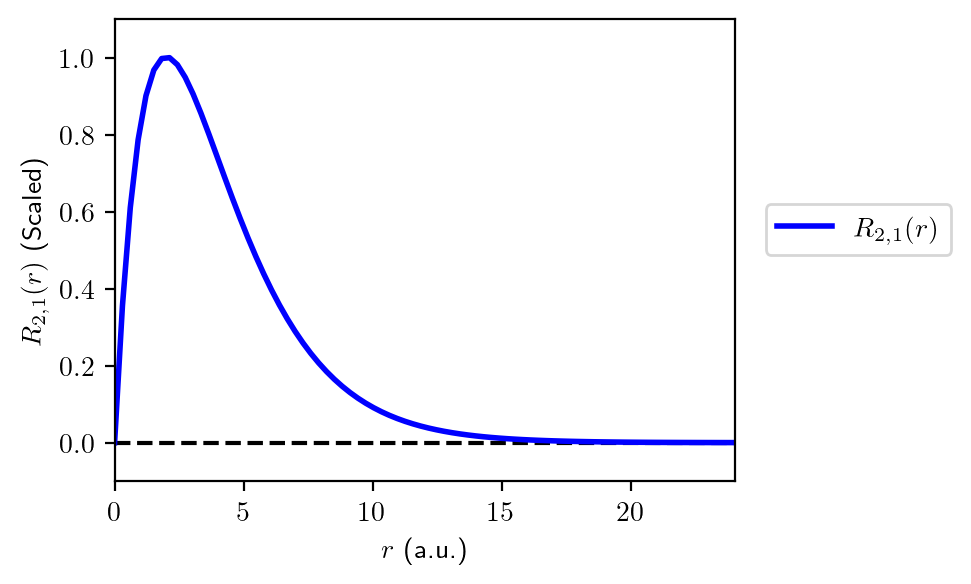

In [9]:
# Generating plot of the radial wavefunction and radial probability density #
plt.rcParams['figure.dpi'] = 200    #makes the figure higher resolution than the Jupyter default
try:
    plt.rcParams['text.usetex'] = True  #allows use of LaTeX in labels
except:
    print('No LaTeX Distribution Detected, Using Plain Text Labels.')
plt.figure(num=1, figsize=(5, 3))   #size is specified because Jupyter randomly resizes things otherwise
r = numpy.linspace(0,rmax,2*N)
rho = 2*r/n   #convenient for calculations
LaP = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)   #radial wavefunction Laguerre polynomial part
Rnl = Cnl*numpy.exp(-rho/2)*rho**l*LaP              #radial component of wavefunction
Pnl = r**2*Rnl**2  #radial probability density
if wavefunction_mode == 'scaled':
    Rnl = Rnl/max(Rnl)   #Rescaling to max value 1
    Pnl = Pnl/max(Pnl)   #Rescaling to max value 1
plt.plot([0,rmax],[0,0], color = 'k', linestyle = '--')
try:
    plt.plot(r, Rnl, lw=2, color = 'blue', label = r'$R_{' + str(n) + ',' + str(l) + '}(r)$') 
except:
    plt.plot(r, Rnl, lw=2, color = 'blue', label = 'Radial Part') 
if (plot_nodes or plot_radial_nodes) or plot_mode == 'probability':
    try:
        plt.plot(r, Pnl,  lw=2, color = 'red', label = r'$P_{' + str(n) + ',' + str(l) + '}(r)$')
    except:
        plt.plot(r, Pnl,  lw=2, color = 'red', label = 'radial part')
if (plot_nodes or plot_radial_nodes) and len(r_nodes) > 0:
    plt.scatter(r_nodes,numpy.zeros(len(r_nodes)),marker='o',color = 'green',facecolors='none')
plt.xlim([0,rmax])
try:
    plt.xlabel(r'$r$ (a.u.)')
except:
    plt.xlabel('r (a.u.)')
if wavefunction_mode == 'scaled':
    plt.ylim([min(Rnl)-0.1,1.1])
    if (plot_nodes or plot_radial_nodes):
        try:
            plt.ylabel(r'$R_{' + str(n) + ',' + str(l) + '}(r), P_{' + str(n) + ',' + str(l) + '}(r)$ (Scaled)')
        except:
            plt.ylabel('Radial Part, Radial Probability (Scaled)')
    else:
        try:
            plt.ylabel(r'$R_{' + str(n) + ',' + str(l) + '}(r)$ (Scaled)')
        except:
            plt.ylabel('Radial Part (Scaled)')
if wavefunction_mode == 'actual':
    plt.ylim([min(Rnl)-0.1*max(max(Rnl),max(Pnl)),1.1*max(max(Rnl),max(Pnl))])
    if (plot_nodes or plot_radial_nodes):
        try:
            plt.ylabel(r'$R_{' + str(n) + ',' + str(l) + '}(r), P_{' + str(n) + ',' + str(l) + '}(r)$')
        except:
            plt.ylabel('Radial Part, Radial Probability')
    else:
        try:
            plt.ylabel(r'$R_{' + str(n) + ',' + str(l) + '}(r)$')
        except:
            plt.ylabel('Radial Part')
plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()  #must not be shown until after the mlab.show() or else the program will freeze

# First Angular Wavefunction Graph
<p> We will also plot the $\theta$ part of the angular wavefunction individually as long as $l>0$, which is an associated Legendre polynomial. We exlude $l=0$ cases since $P_0^0(\cos(\theta)) = 1$ is trivial. We include the normalization in this part of the wavefunction based upon the mathematical manipulations we showed in our paper. Once again, if the user requested the $\theta$ nodal surfaces to be plotted, the calculated nodes will appear as green circles in this graph. Note that we also include a plot of $P_0^0(\cos(\theta))^2$ since this is used when determining the $\theta$ nodes since the nodes are all minima of this function. 

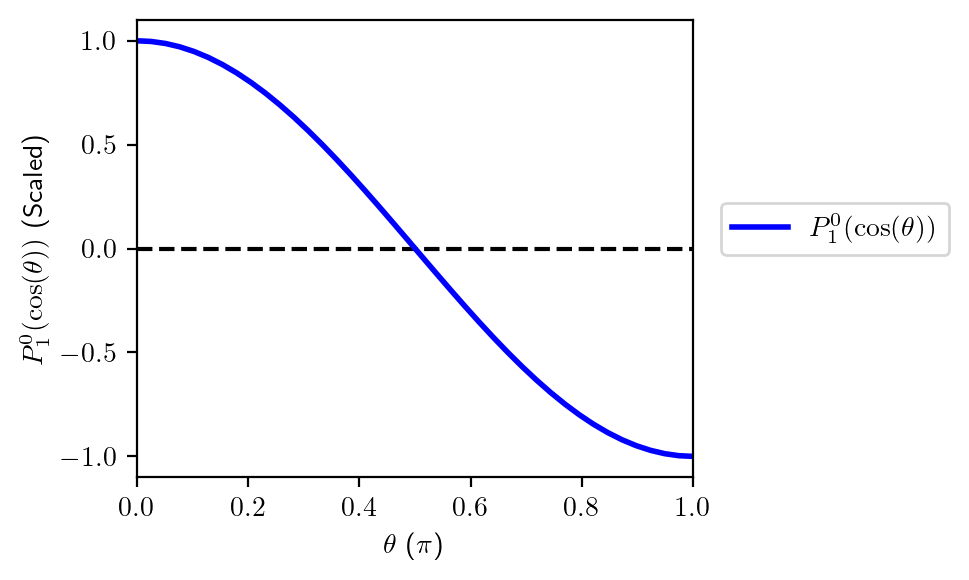

In [15]:
# Generating plot of the theta angular wavefunction #
if l == 0:
    print('Theta part is trivial since l = 0 gives P_0^0 = 1')
if l > 0:
    plt.figure(num=2, figsize=(5, 3))
    theta = numpy.linspace(0,numpy.pi,N)
    LeP = (-1)**m*Nlm*scipy.special.lpmv(m,l,numpy.cos(theta))  #We give the normalization constant to theta part
    if wavefunction_mode == 'scaled':
        LeP = LeP/max(LeP)
    plt.plot([0,1],[0,0], color = 'k', linestyle = '--')
    try:
        plt.plot(theta/numpy.pi, LeP, lw=2, color = 'blue', label = r'$P_' + str(l) + '^' + str(m) + r'(\cos(\theta))$') 
    except:
        plt.plot(theta/numpy.pi, LeP, lw=2, color = 'blue', label = 'theta Part') 
    if (plot_nodes or plot_theta_nodes) or plot_mode == 'probability': 
        try:
            plt.plot(theta/numpy.pi, LeP**2, lw=2, color = 'red', label = r'$P_' + str(l) + '^' + str(m) + r'(\cos(\theta))^2$')
        except:
            plt.plot(theta/numpy.pi, LeP**2, lw=2, color = 'red', label = 'Square of theta part')
    if (plot_nodes or plot_theta_nodes) and len(theta_nodes) > 0:
        plt.scatter(theta_nodes/numpy.pi,numpy.zeros(len(theta_nodes)),marker='o',color = 'green',facecolors='none')
    plt.xlim([0,1])
    try:
        plt.xlabel(r'$\theta$ ($\pi$)')
    except:
        plt.xlabel('theta (pi)')
    if wavefunction_mode == 'scaled':
        plt.ylim([min(LeP)-0.1*max(LeP),1.1*max(LeP)])
        if (plot_nodes or plot_theta_nodes):
            try:
                plt.ylabel(r'$P_' + str(l) + '^' + str(m) + r'(\cos(\theta))$, $P_' + str(l) + '^' + str(m) + r'(\cos(\theta))^2$ (Scaled)')
            except:
                plt.ylabel('theta Part, Square of theta Part (Scaled)')
        else:
            try:
                plt.ylabel(r'$P_' + str(l) + '^' + str(m) + r'(\cos(\theta))$ (Scaled)')
            except:
                plt.ylabel('theta Part (Scaled)')
    if wavefunction_mode == 'actual':
        plt.ylim([min(LeP)-0.1*max(max(LeP),max(LeP**2)),1.1*max(max(LeP),max(LeP**2))])
        if (plot_nodes or plot_theta_nodes):
            try:
                plt.ylabel(r'$P_' + str(l) + '^' + str(m) + r'(\cos(\theta))$, $P_' + str(l) + '^' + str(m) + r'(\cos(\theta))^2$')
            except:
                plt.ylabel('theta Part, Square of theta Part')
        else:
            try:
                plt.ylabel(r'$P_' + str(l) + '^' + str(m) + r'(\cos(\theta))$')
            except:
                plt.ylabel('theta Part')
    plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()  #must not be shown until after the mlab.show() or else the program will freeze

# Second Angular Wavefunction Graph
<p> Finally, we will plot the real and imaginary parts of the $\phi$ part of the angular wavefunction, Re$(e^{im\phi}) = \cos(m\phi)$ and Im$(e^{im\phi}) = \sin(m\phi)$, to complete our set of simpler pictures of what is going on. This is only done when $m\neq0$ since the $\phi$ part of the wavefunction for $m=0$ is simply $e^0=1$. Note that the vertical line drawn if the user requests the $\phi$ nodal surfaces denotes the fact that only the nodes in the range $[0,\pi)$ or $(0,\pi]$ are non-redundant (we use the former in this program). The rest are just repeats of the former since the plane for a node at $\phi$ also corresponds to the value of $\phi+\pi$, which can be easily verified visually. The nodes for the real and imaginary parts of the wavefunction are denoted with green circles and squares, respectively. Together, these three plots of the various wavefunction components can be used to dissect the wavefunction. 

In [11]:
# Generating plot of the phi angular wavefunction #
if m == 0:
    print('Phi part is trivial since m = 0 gives exp(0) = 1')
if abs(m) > 0 :
    plt.figure(num=3, figsize=(5, 3))
    phi = numpy.linspace(0,2*numpy.pi,2*N)
    F = numpy.exp(complex(0,1)*m*phi)  #the wavefunction for phi
    plt.plot([0,2],[0,0], color = 'k', linestyle = '--')
    if plot_nodes == True:
        plt.plot([1,1],[-1.3,1.3], color = 'green', linestyle = '--')
    if (plot_nodes or plot_phi_nodes):
        if len(real_phi_nodes) > 0:
            plt.scatter(real_phi_nodes/numpy.pi,numpy.zeros(len(real_phi_nodes)),marker='o',color = 'green',facecolors='none')
        if len(imag_phi_nodes) > 0:
            plt.scatter(imag_phi_nodes/numpy.pi,numpy.zeros(len(imag_phi_nodes)),marker='s',color = 'green',facecolors='none')
    if m > 1:
        try:
            plt.plot(phi/numpy.pi, numpy.real(F), lw=2, color = 'blue', label = r'Re$(e^{' + str(m) + 'i \phi})$')
            plt.plot(phi/numpy.pi, numpy.imag(F), lw=2, color = 'red', label = r'Im$(e^{' + str(m) + 'i \phi})$')
        except:
            plt.plot(phi/numpy.pi, numpy.real(F), lw=2, color = 'blue', label = 'Real Part for phi')
            plt.plot(phi/numpy.pi, numpy.imag(F), lw=2, color = 'red', label = 'Imaginary Part for phi')
    if m == 1:
        try:
            plt.plot(phi/numpy.pi, numpy.real(F), lw=2, color = 'blue', label = r'Re$(e^{i \phi})$')
            plt.plot(phi/numpy.pi, numpy.imag(F), lw=2, color = 'red', label = r'Im$(e^{i \phi})$')
        except:
            plt.plot(phi/numpy.pi, numpy.real(F), lw=2, color = 'blue', label = 'Real Part for phi')
            plt.plot(phi/numpy.pi, numpy.imag(F), lw=2, color = 'red', label = 'Imaginary Part for phi')
    plt.xlim([0,2])
    plt.ylim([-1.3,1.3])
    try:
        plt.xlabel(r'$\phi$ ($\pi$)')
    except:
        plt.xlabel('phi (pi)')
    if m > 1:
        try:
            plt.ylabel(r'Re$(e^{' + str(m) + 'i \phi})$,Im$(e^{i' + str(m) + '\phi})$')
        except:
            plt.ylabel('Real and Imaginary Parts for phi')
    if  m == 1:
        try:
            plt.ylabel(r'Re$(e^{i \phi})$,Im$(e^{i \phi})$')
        except:
            plt.ylabel('Real and Imaginary Parts for phi')
    plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()  #must not be shown until after the mlab.show() or else the program will freeze

Phi part is trivial since m = 0 gives exp(0) = 1


# Colormap and Opacity Graph
<p> Finally, we make a plot showing off the values of our custom colormap and the range over which it is valid. We also show the values of the opacity that are used when plotting the wavefunctions. These are plotted as scatter plots to aid with seeing the real trends in the values since there will typically be fewer than 50 data points used for the colormap. 

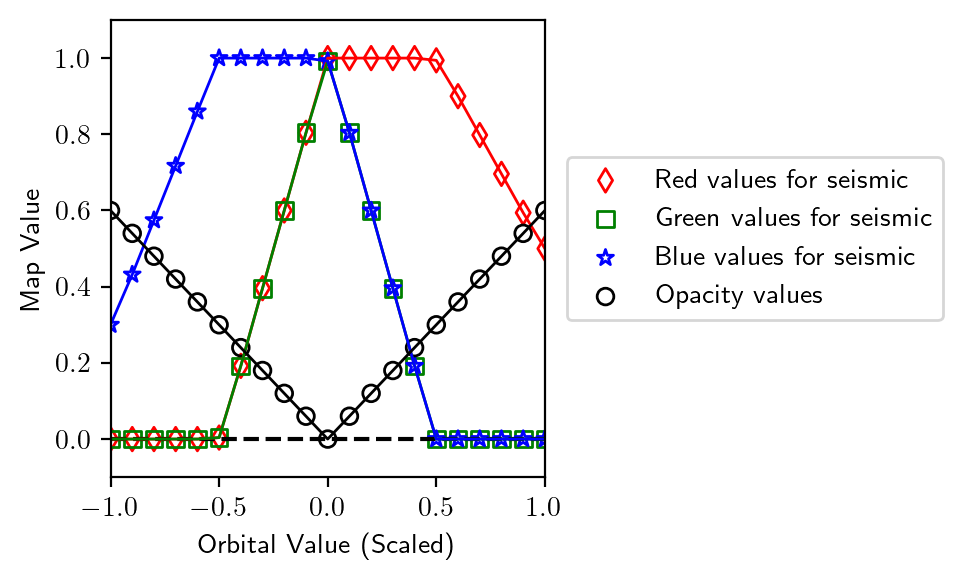

In [16]:
plt.figure(num=4, figsize=(5, 3))
if wavefunction_mode == 'scaled':
    values = numpy.linspace(-1,1,colormap_points) 
if wavefunction_mode == 'actual':
    if plot_mode == 'orbital' or plot_mode == 'original':
        values = numpy.linspace(-PhiMax,PhiMax,colormap_points)
    if plot_mode == 'probability density':
        values = numpy.linspace(-PhiMax**2,PhiMax**2,colormap_points)
plt.plot([min(values),max(values)],[0,0], color = 'k', linestyle = '--')
opacities = [opacity_factor*((numpy.abs(-colormap_points//2+i+1)/(colormap_points//2))**opacity_exponent)+opacity_shift for i in range(colormap_points)]
plt.scatter(values,color_array[:,0], lw=1, color = 'red', label = 'Red values for ' + colormap,marker='d',facecolors='none')
plt.scatter(values,color_array[:,1], lw=1, color = 'green', label = 'Green values for ' + colormap,marker='s',facecolors='none')
plt.scatter(values,color_array[:,2], lw=1, color = 'blue', label = 'Blue values for ' + colormap,marker='*',facecolors='none')
plt.scatter(values,opacities, lw=1, color = 'black', label = 'Opacity values',marker='o',facecolors='none')
plt.plot(values,color_array[:,0], lw=1, color = 'red')
plt.plot(values,color_array[:,1], lw=1, color = 'green')
plt.plot(values,color_array[:,2], lw=1, color = 'blue')
plt.plot(values,opacities, lw=1, color = 'black')
if plot_mode == 'probability density':
    plt.plot([1,1],[-1.1,1.1], color = 'black', linestyle = '--')  #shows that probability only uses positive values
plt.xlim([min(values),max(values)])
plt.ylim([-0.1,1.1])
if plot_mode == 'orbital':
    label_string = 'Orbital Value'
if plot_mode == 'probability density':
    label_string = 'Probability Density Value'
if plot_mode == 'original':
    label_string = 'Orbital Value'
if wavefunction_mode == 'scaled':
    label_string += ' (Scaled)'
plt.xlabel(label_string)
plt.ylabel('Map Value')
plt.legend(bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()  #must not be shown until after the mlab.show() or else the program will freeze